In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')

%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/arjoonn/dev/kaggle/env/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Lorenz systems

The Lorenz equations describe the evolution of the spacial variables *x, y, z* given the governing parameters $\sigma, \beta, \rho$ through the specification of the time derivative spacial variables:
$$ \frac{dx}{dt} = \sigma(y - x)\\ 
\frac{dy}{dt} = x(\rho - z) - y\\
\frac{dz}{dt} = xy - \beta z$$

Let's get started.

In [48]:
def lorenz_derivative(point, t0, sigma=10.0, beta=8.0/3, rho=28.0):
    x, y, z = point
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
           ]

x0 = [1, 1, 1]
t = np.linspace(0, 3, 1000)
x_t = integrate.odeint(lorenz_derivative, x0, t)

Now that the integration is done, we need to plot it.

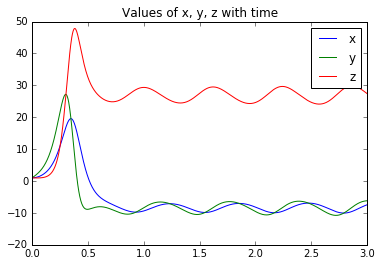

In [49]:
plt.plot(t, x_t[:,0], label='x')
plt.plot(t, x_t[:,1], label='y')
plt.plot(t, x_t[:,2], label='z')
plt.title('Values of x, y, z with time')
plt.legend()

A better plot would be to visualize it in 3 dimensions by projecting it onto a plane to visualize. We will create a lot of trajectories to see how things move

In [58]:

n_trajectories = 20

x0 = 10 + 30 * np.random.random((n_trajectories, 3))
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorenz_derivative, x0i, t) for x0i in x0])

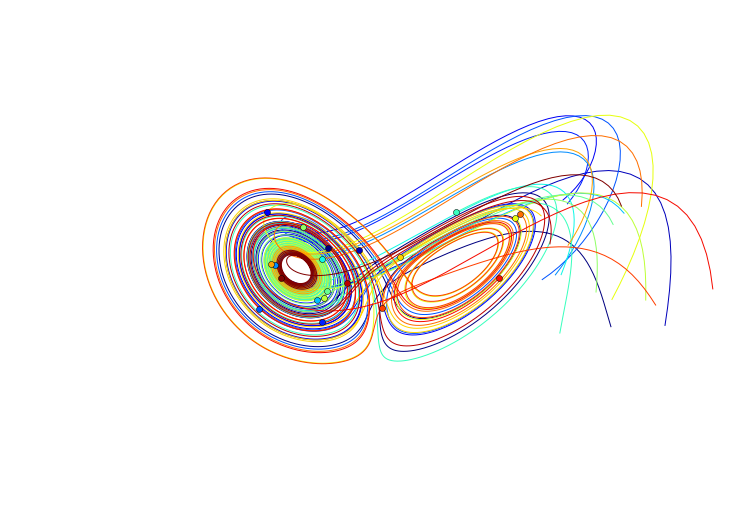

In [61]:
# figure setup
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')
colors = plt.cm.jet(np.linspace(0, 1, n_trajectories))

lines, pts = None, None
for p in [ax.plot([], [], [], '-', c=c) for c in colors]:
    if lines is None:
        lines = p
    else:
        lines += p
for p in [ax.plot([], [], [], 'o', c=c) for c in colors]:
    if pts is None:
        pts = p
    else:
        pts += p
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

ax.view_init(30, 0) # point of view, (altitute degree, azimuth angle)

# initialization function
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])
        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function
def animate(i):
    # 2 time frames per second
    i = (2 * i) % x_t.shape[1]
    
    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)
        
        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])
    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=30, blit=True)
anim

In [62]:
anim.save('../../support/videos/lorenz_{}.mp4'.format(n_trajectories))

### Precomputed Video
In case you want to see a pre computed video, it's available in the `support/video` section.